**Atividade - Regressão**

Base de dados: Student Performance Data Set
Link da base utilizada: [https://archive.ics.uci.edu/ml/datasets/Student+Performance](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

Aplicada regreção para predição da nota do terceiro ano, o atributo G3.

Foi utilizado apenas a base com informações da disciplina de matemática.

|Data Set Characteristics  |Attribute Characteristics|Associated Tasks|Number of Instances|Number of Attributes|Missing Values?|Area|Date Donated|Number of Web Hits|
|--|--|--|--|--|--|--|--|--|--|
|Multivariate  |Integer  |Classification, Regression|649|33|N/A|Social|2014-11-27|805495|

**Attribute Information:**

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  
2 sex - student's sex (binary: 'F' - female or 'M' - male)  
3 age - student's age (numeric: from 15 to 22)  
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)  
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)  
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)  
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)  
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')  
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 schoolsup - extra educational support (binary: yes or no)  
17 famsup - family educational support (binary: yes or no)  
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)  
31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, output target)

-0.32934204177364634
[ 0.47054758  0.14948162 -0.20046544  0.02827147  0.03094619 -0.14998983
  0.12915748 -0.12667257  0.01978433 -0.11455768  0.07309069  0.0831302
  0.10412031 -0.11183264 -0.20758308  0.49208205  0.15866203  0.05742714
 -0.37215601 -0.22423079  0.09952801 -0.20259059 -0.26683469  0.35176616
  0.0525986   0.02773479 -0.1780402   0.16969358  0.07055465  0.04395452
  0.18886001  0.95658199]
3.2663721110713055


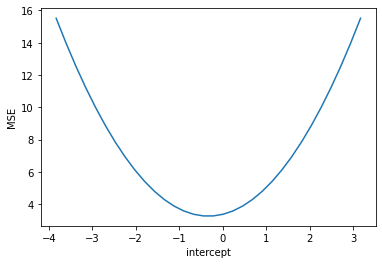

In [426]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def erro(W0,modelo):

    Erro = np.empty(W0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.intercept_ = W0[j][k]
            ypred = modelo.predict(X)
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

'''Ler Base de dados'''
df = pd.read_csv('student/student-mat.csv',';')


'''Transformando dados que são categorias para números'''
LE = LabelEncoder()
df['school'] = LE.fit_transform(df['school'])
df['sex'] = LE.fit_transform(df['sex'])
df['address'] = LE.fit_transform(df['address'])
df['famsize'] = LE.fit_transform(df['famsize'])
df['Pstatus'] = LE.fit_transform(df['Pstatus'])
df['Mjob'] = LE.fit_transform(df['Mjob'])
df['Fjob'] = LE.fit_transform(df['Fjob'])
df['reason'] = LE.fit_transform(df['reason'])
df['guardian'] = LE.fit_transform(df['guardian'])
df['schoolsup'] = LE.fit_transform(df['schoolsup'])
df['famsup'] = LE.fit_transform(df['famsup'])
df['paid'] = LE.fit_transform(df['paid'])
df['activities'] = LE.fit_transform(df['activities'])
df['nursery'] = LE.fit_transform(df['nursery'])
df['higher'] = LE.fit_transform(df['higher'])
df['internet'] = LE.fit_transform(df['internet'])
df['romantic'] = LE.fit_transform(df['romantic'])

X,y=df.loc[:, 'school':'G2'],df['G3']

modelo = LinearRegression()

'''Treinar o modelo com a base toda'''
modelo.fit(X,y)

'''Realizar predição'''
ypred = modelo.predict(X)

'''Calcular MSE'''
mse = mean_squared_error(y,ypred)

print(modelo.intercept_)
print(modelo.coef_)
print(mse)

delta = 3.5
x0 = np.linspace(modelo.intercept_-delta,modelo.intercept_+delta,32)

W0, W1 = np.meshgrid(x0, modelo.coef_)

Erro = erro(W0,modelo)

'''Plotando o gráfico'''
plt.ylabel("MSE")
plt.xlabel("intercept")
i = 1
plt.plot(W0[i,:],Erro[i,:])
plt.show()

